# Vlasov-Poisson equation

$$
\frac{\partial f}{\partial t}+ v\cdot \nabla_x f + E(t,x) \cdot \nabla_v f =0,
$$
$$
\rho(t,x) = \int f(t,x,v)dv,
$$
$$
E(t,x) = \int \rho(t,x,v)dx  - \bar{\rho},
$$





# Landau Damping

In [10]:
import numpy as np

In [11]:
v_x = np.linspace(0,4.0*np.pi,100)
v_v = np.linspace(-6.0,6.0, 100)

x, v = np.meshgrid(v_x, v_v)

eps = 0.05
kx  = 0.5 

f = (1.0+eps*np.cos(kx*x))/(2.0*np.pi)* np.exp(-0.5*v*v)

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

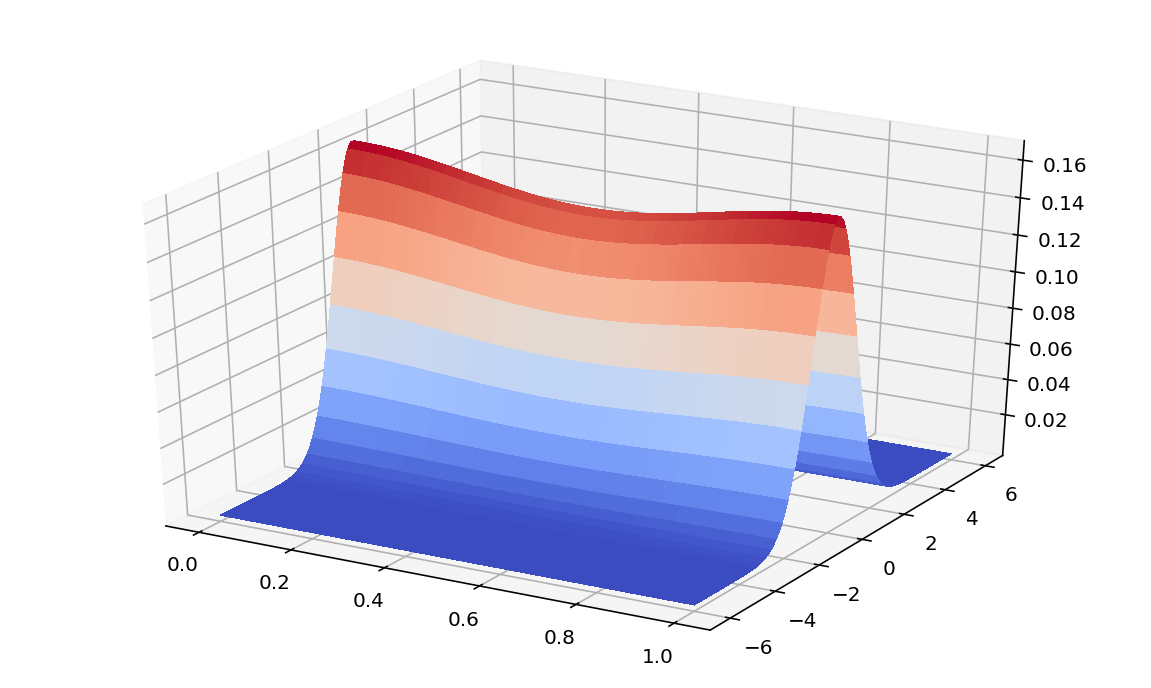

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, v, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [68]:
import numpy as np
from math import floor

class Interpolator():
    
    num_terms = 27
    
    def __init__(self, n, xmin, xmax):
        
        assert ( n > self.num_terms)
        self.n      = n
        self.xmin   = xmin
        self.xmax   = xmax
        self.rdelta = (n-1) / (xmax - xmin)
        self.d      = np.zeros(n)
        self.coeffs = np.zeros(n+3)
        
    def compute_interpolants( self, f ):
        
        n = self.n
        num_terms = self.num_terms
        a=np.sqrt((2.0+np.sqrt(3.0))/6.0)
        r_a = 1.0/a
        b=np.sqrt((2.0-np.sqrt(3.0))/6.0)
        b_a = b/a

        d1 = f[0]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 += coeff_tmp*f[n-2-i]

        self.d[0] = d1*r_a
        for i in range(1,n-1):
            self.d[i] = r_a*(f[i] - b*self.d[i-1])
        
        d1        = self.d[-2]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 += coeff_tmp*self.d[i]

        self.coeffs[n-1] = d1*r_a
    
        for i in range(n-2, 0, -1):
           self.coeffs[i] = r_a*(self.d[i-1] - b*self.coeffs[i+1])

        self.coeffs[0]  = self.coeffs[-4]
        self.coeffs[-1:-4:-1] = self.coeffs[3:0:-1]
        
    def interpolate( self, x ):
        
        rh      = self.rdelta
        t0      = (x-self.xmin)*rh
        cell    = floor(t0)
        dx      = t0 - cell
        cdx     = 1.0 - dx
        cim1    = self.coeffs[cell]
        ci      = self.coeffs[cell+1]
        cip1    = self.coeffs[cell+2]
        cip2    = self.coeffs[cell+3]
        t1      = 3.0*ci
        t3      = 3.0*cip1
        t2      = cdx*(cdx*(cdx*(cim1 - t1) + t1) + t1) + ci
        t4      =  dx*( dx*( dx*(cip2 - t3) + t3) + t3) + cip1
            
        return (t2 + t4) / 6.0



In [69]:
n =1000
cs = Interpolator(n,0,1)
x = np.linspace(0,1,n)
y = np.sin(x*2*np.pi)
x_new = x.min() + np.random.random(n) * (x.max() - x.min())
x_new.sort()



In [70]:
%%timeit
cs.compute_interpolants(y)
y_new = map(cs.interpolate,x_new)

1.12 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


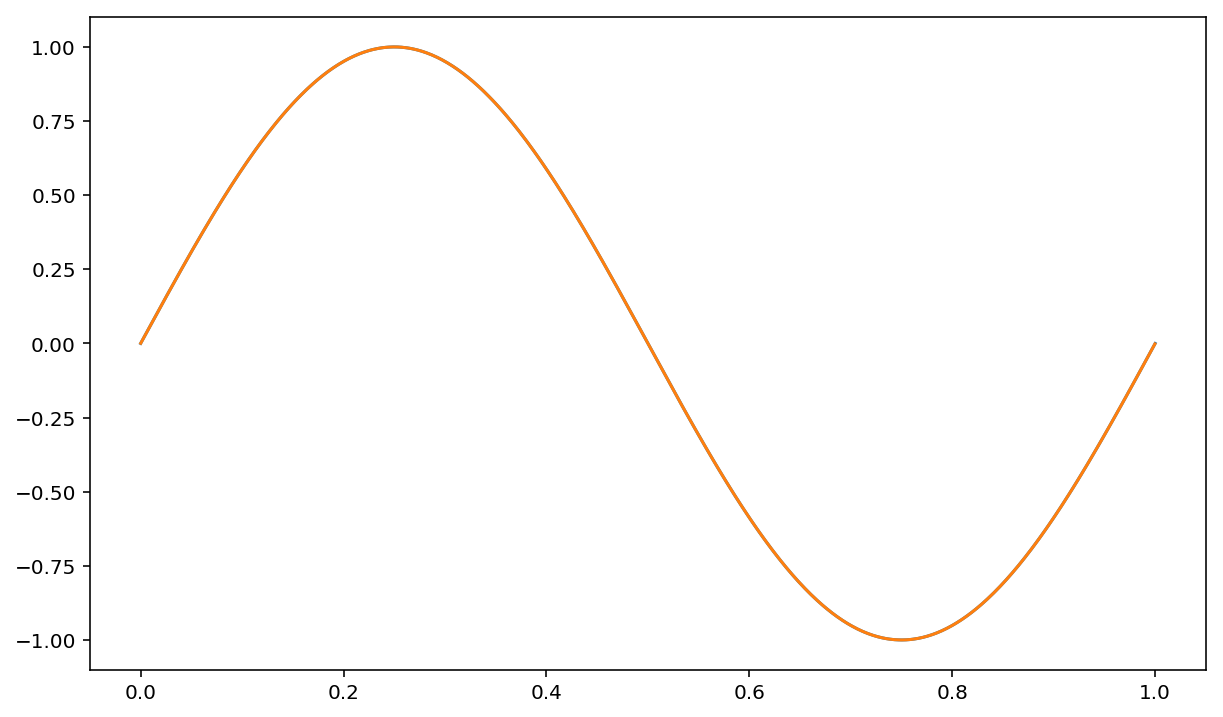

In [71]:
plt.plot(x, y,  x_new, [cs.interpolate(e) for e in x_new]);